<a href="https://colab.research.google.com/github/AkshayaSobanan/Machine-Learning/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Information**

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.





In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import re
import nltk

Loading DataSet

In [10]:
test=pd.read_csv('test_data.csv')
train=pd.read_csv('train_data.csv')

In [11]:
train.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [13]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [14]:
#Data set Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [15]:
#Checking for null values
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [16]:
#Removing Duplicate Values from train dataset
train.drop_duplicates(subset=['tweet'],inplace=True)
train.reset_index(inplace=True)
print(f'The shape of train data after dropping duplicates: {train.shape}')

The shape of train data after dropping duplicates: (29530, 4)


In [17]:
train.head()

,index,id,label,tweet
0,0,1,0,@user when a father is dysfunctional and is s...
1,1,2,0,@user @user thanks for #lyft credit i can't us...
2,2,3,0,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation


Data Preprocessing

In [20]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
portstem=PorterStemmer()
def remove_pattern(input_text):
  data=re.findall("@[\w]*",input_text) #removing twitter handles @User
  for word in data:
    input_text=re.sub(word,'',input_text)
  input_text = re.sub('[^a-zA-Z#]',' ',input_text) #Removing special characters, numbers and punctuations
  input_text=input_text.lower().split()
  #Removing stopwords and short words
  input_text=[portstem.stem(words) for words in input_text if words not in set(stopwords.words('english')) and len(words)>3]
  return ' '.join(input_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
train['Clean_tweet']=train['tweet'].apply(remove_pattern)

In [22]:
train.head()

,index,id,label,tweet,Clean_tweet
0,0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus offer wheelchair van #...
2,2,3,0,bihday your majesty,bihday majesti
3,3,4,0,#model i love u take with u all the time in ...,#model love take time
4,4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [23]:
#Visualize the frequent words
freq_words=' '.join([words for words in train['Clean_tweet']])
freq_words

'father dysfunct selfish drag kid dysfunct #run thank #lyft credit caus offer wheelchair van #disapoint #getthank bihday majesti #model love take time factsguid societi #motiv huge fare talk leav chao disput #allshowandnogo camp tomorrow danni next school year year exam think #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom #ireland consum price index climb previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl blame conced goal rooney gave away free kick know bale littl dude #badday #con

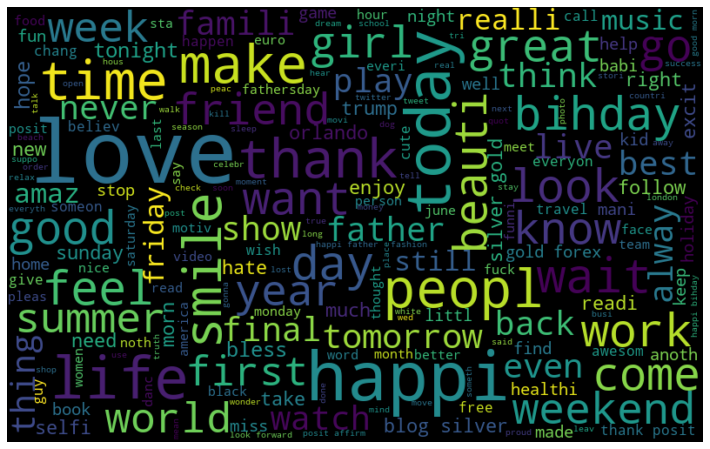

In [27]:
import wordcloud
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=50,max_font_size=100).generate(freq_words)
#plotting
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
#Plot for frequently used positive tweets
freq_poswords=' '.join([word for word in train['Clean_tweet'][train['label']==0]])
freq_poswords

'father dysfunct selfish drag kid dysfunct #run thank #lyft credit caus offer wheelchair van #disapoint #getthank bihday majesti #model love take time factsguid societi #motiv huge fare talk leav chao disput #allshowandnogo camp tomorrow danni next school year year exam think #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom #ireland consum price index climb previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf ouch junior angri #got #junior #yugyoem #omg thank paner #thank #posit #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl blame conced goal rooney gave away free kick know bale littl dude #badday #coneofsham #cat #piss #funni #laugh product happi #wine tool #weekend time open drink #tgif #gamedev #indiedev #indiegamedev #squad beauti sign vendor #upsideof

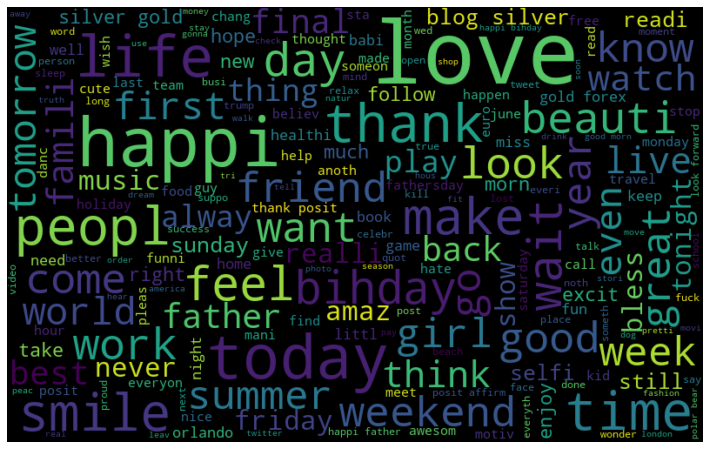

In [29]:
pos_wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(freq_poswords)
#plotting
plt.figure(figsize=(15,8))
plt.imshow(pos_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
#plot for frequently used negative words
freq_negwords=' '.join([word for word in train['Clean_tweet'][train['label']==1]])
freq_negwords

'#cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin retweet agre lumpi say prove lumpi unbeliev centuri need someth like #neverump #xenophobia let fight #love #peac white establish folx run around love promot great white peopl call peopl white #race #ident #med #altright use insecur lure #whitesupremaci interest #linguist address #race racism #power #raciolinguist bring mock obama black #brexit #peopl protest #trump #republican trump fuher call #michelleobama gorilla racist long thought black peopl smaller hand show barri probabl lie #knick game suck #golf point finger million point right back #jewishsupremacist might libtard #libtard #sjw #liber #polit take #trash america vote #hate vote vote hold open door woman woman nice thing even deni governor state biggest african american popul #stereotyp #prejudic offer #hope solut creat repetit #hate #conflict many#pol pass mani time said noth #blueli

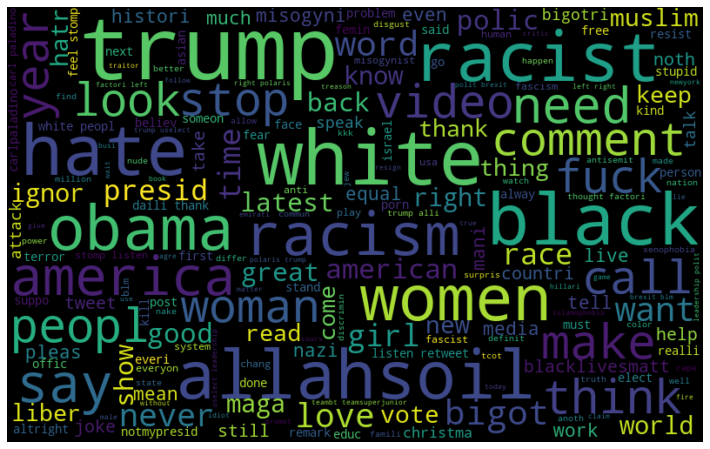

In [31]:
neg_wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(freq_negwords)
#plotting
plt.figure(figsize=(15,8))
plt.imshow(neg_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
#Extract hastags
def hashtag_ext(tweets):
  hashtags = []# loop words in the tweet
  for tweet in tweets:
    ht = re.findall(r"#(\w+)", tweet)
    hashtags.append(ht)
  return hashtags 

In [40]:
post_hashtag=hashtag_ext(train['Clean_tweet'][train['label']==0])
neg_hashtag=hashtag_ext(train['Clean_tweet'][train['label']==1])

In [41]:
post_hashtag[:10]

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 []]

In [42]:
neg_hashtag[:10]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist']]

In [43]:
post_hashtag = sum(post_hashtag, [])
neg_hashtag = sum(neg_hashtag, [])

In [44]:
post_hashtag[:10]

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate']

In [45]:
freq = nltk.FreqDist(post_hashtag)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,52


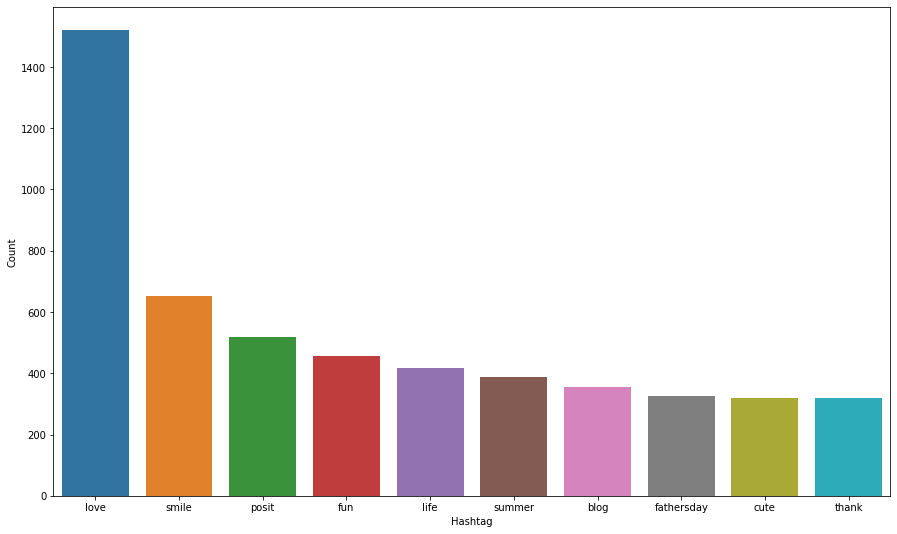

In [46]:
# select top 10 hashtags
import seaborn as sns
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [47]:
freq = nltk.FreqDist(neg_hashtag)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,13
3,australia,6
4,opkillingbay,5


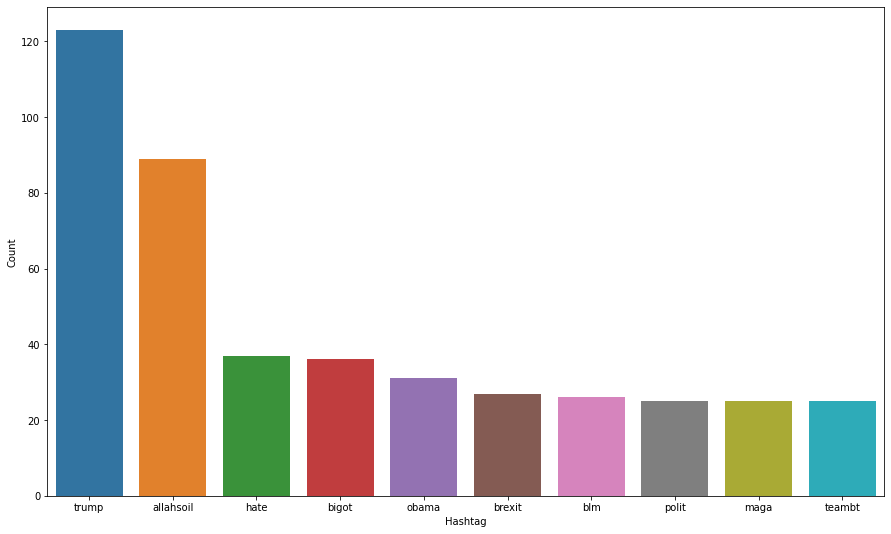

In [48]:
# select top 10 hashtags
import seaborn as sns
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

Input Split

In [52]:
#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
vector=vectorizer.fit_transform(train['Clean_tweet'])

In [53]:
vector[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(vector,train['label'],test_size=0.3,random_state=24)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix

In [57]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [58]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.3205479452054794

In [59]:
accuracy_score(y_test,pred)

0.9440117394739813

In [60]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5263157894736842

In [61]:
accuracy_score(y_test,pred)

0.952251947172367

In [63]:
confusion_matrix(y_test,pred)

array([[8201,   56],
       [ 367,  235]])